In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [7]:
Y = iris.target

In [10]:
X = iris.data

In [15]:
X = pd.DataFrame(X)
X.columns = ["sepal length", "sepal width", "petal length", "petal width"]
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier(max_depth=2)

In [24]:
treeclassifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

## visualize the decision tree

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

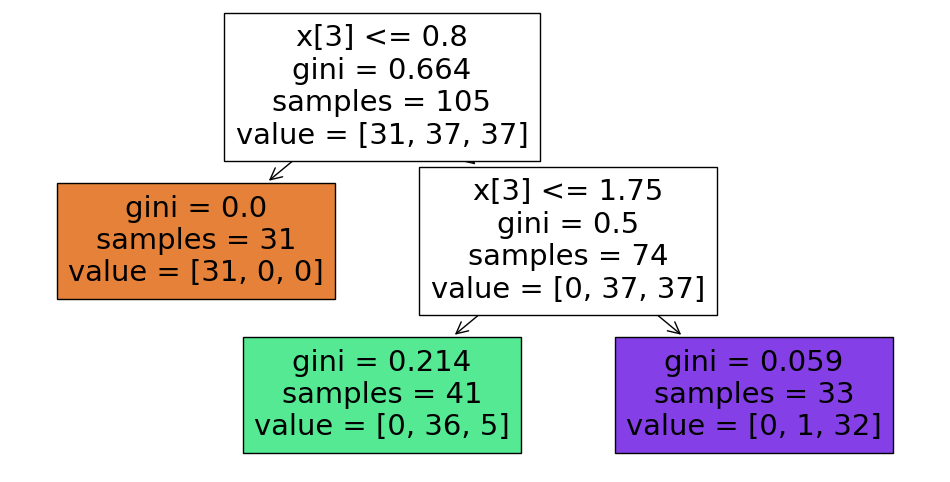

In [25]:
from sklearn import tree
plt.figure(figsize=(12,6))
tree.plot_tree(treeclassifier, filled = True)

In [26]:
y_pred = treeclassifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [31]:
print(confusion_matrix(y_pred, Y_test))
print(accuracy_score(y_pred, Y_test))
print(classification_report(y_pred, Y_test))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Decision tree pre-pruning and hyper-parameter tuning

In [33]:
param = {
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "splitter" : ["best", "random"],
    "max_depth" : [1, 2, 3, 4, 5, 6],
    "max_features" : ['sqrt', 'log2', 'auto']
}

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()

model = GridSearchCV(estimator=treeclassifier,param_grid=param, scoring= "accuracy", n_jobs=-1, cv=5)



In [35]:
model.fit(X_train, Y_train)

C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\dipu\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dipu\anaconda3\Lib\site-packages\sk

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [36]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [37]:
model.best_score_

0.9428571428571428

In [38]:
y_pred = model.predict(X_test)

In [40]:
print(accuracy_score(y_pred, Y_test))
print(confusion_matrix(y_pred, Y_test))
print(classification_report(y_pred, Y_test))

0.8222222222222222
[[19  0  0]
 [ 0  7  2]
 [ 0  6 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.78      0.64         9
           2       0.85      0.65      0.73        17

    accuracy                           0.82        45
   macro avg       0.79      0.81      0.79        45
weighted avg       0.85      0.82      0.83        45

